##### Title: Linear Regression Assignment
 - Name : Sushma KR
 - Date : 15-Mar-2018
 - Description : Model price of cars and identify independent variables that drive the price. 

### Importing and Understanding Data

In [224]:
# Import the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm  
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import the file

cars = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
# Look at the first 5 rows
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Look at the last 5 rows
cars.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
# Check the dimension of the dataframe
cars.shape

(205, 26)

In [6]:
# Understand the data structure
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Preparing data for analysis

#### Creating a new derived variable

In [7]:
# Extract car manufacturer name into a different column
cars["CarMake"] = cars["CarName"].apply(lambda x: x.lower().split(" ")[0])

In [8]:
# Check all the unique values in the column
cars["CarMake"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
# In some of the places, the manufacturer name is misspelt which will be fixed through the following commands

In [10]:
cars.loc[cars["CarMake"] == "maxda", "CarMake"] = "mazda"

In [11]:
cars.loc[cars["CarMake"] == "porcshce", "CarMake"] = "porsche"

In [12]:
cars.loc[cars["CarMake"] == "toyouta", "CarMake"] = "toyota"

In [13]:
cars.loc[cars["CarMake"] == "vw", "CarMake"] = "volkswagen"

In [14]:
cars.loc[cars["CarMake"] == "vokswagen", "CarMake"] = "volkswagen"

In [15]:
cars.loc[cars["CarMake"] == 'alfa-romero', "CarMake"] = "alfa-romeo"

In [16]:
# This column will serve no purpose, its just a runnng sequence, so we will drop it
cars.drop("car_ID", inplace = True, axis=1)

In [17]:
# Car Name will not be useful for analysis either, can be dropped
cars.drop("CarName", inplace = True, axis=1)

In [18]:
# Check the values after clean up
cars["CarMake"].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Check the unique values for all categorical variables

In [19]:
cars["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [20]:
cars["carbody"].unique()    

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'], dtype=object)

In [21]:
cars["drivewheel"].unique()    

array(['rwd', 'fwd', '4wd'], dtype=object)

In [22]:
cars["enginelocation"].unique()  

array(['front', 'rear'], dtype=object)

In [23]:
cars["enginetype"].unique()  

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [24]:
cars["cylindernumber"].unique()  

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], dtype=object)

In [25]:
cars["fuelsystem"].unique()  

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'], dtype=object)

In [26]:
cars["fueltype"].unique()  

array(['gas', 'diesel'], dtype=object)

In [27]:
cars["doornumber"].unique()  

array(['two', 'four'], dtype=object)

### Visualizing data

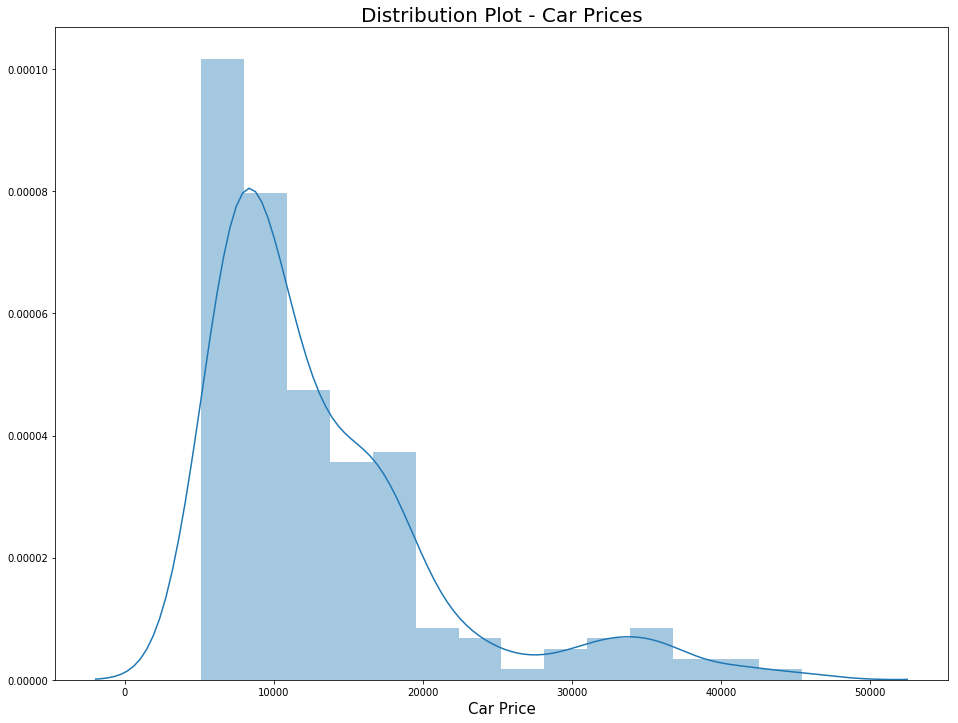

In [28]:
# Understand the pricing of cars

plt.figure(figsize = (16, 12))
sns.distplot(cars['price'])
plt.title('Distribution Plot - Car Prices', fontsize = 20)
plt.xlabel('Car Price', fontsize = 15)
plt.show()

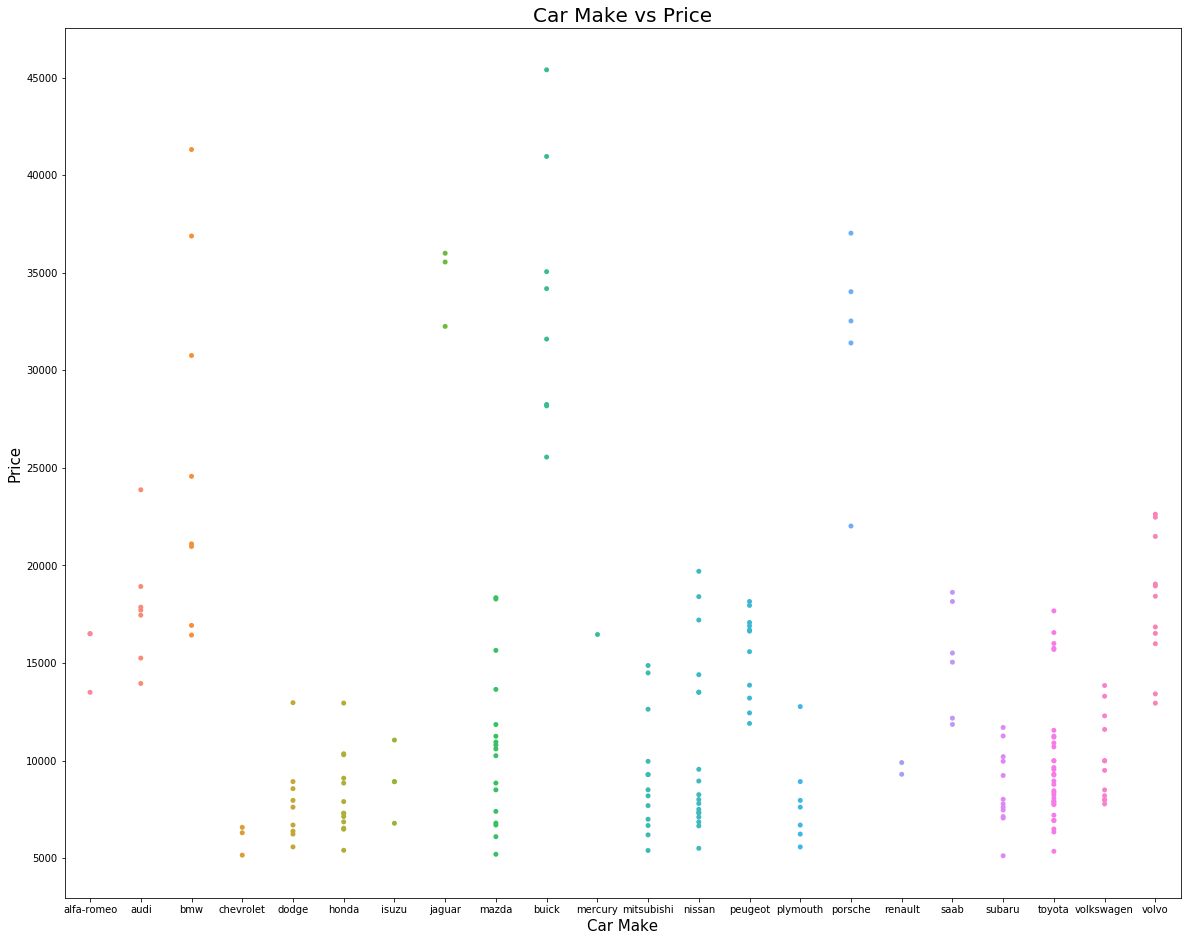

In [29]:
# Check the price of cars by each Car Manufacturer

plt.figure(figsize = (20,16))
sns.stripplot(x="CarMake", y="price", data=cars);
plt.title('Car Make vs Price', fontsize = 20)
plt.xlabel('Car Make', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

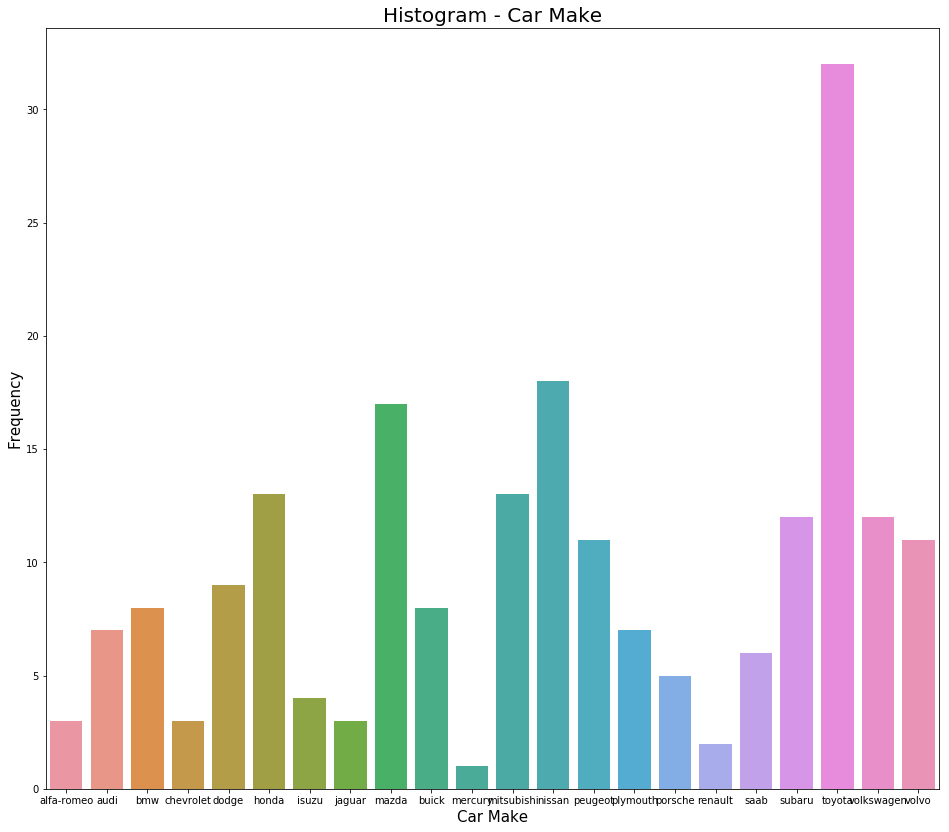

In [30]:
# Check the number of cars by each manufacturer

plt.figure(figsize = (16,14))
sns.countplot(cars["CarMake"])
plt.title('Histogram - Car Make', fontsize = 20)
plt.xlabel('Car Make', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

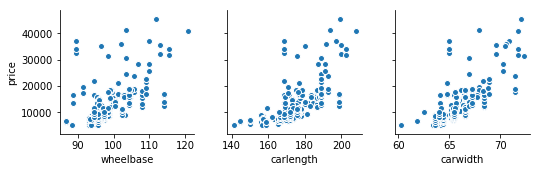

In [31]:
# See how car prices are influenced by each of the continous variables

sns.pairplot(cars, x_vars=["wheelbase",
"carlength",
"carwidth"], y_vars='price', kind='scatter')
plt.show()

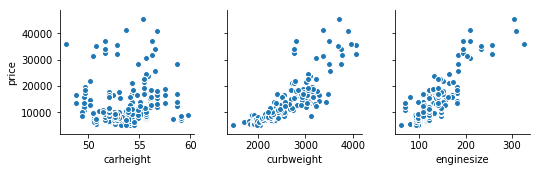

In [32]:
sns.pairplot(cars, x_vars=[
"carheight",
"curbweight",
"enginesize",
], y_vars='price', kind='scatter')
plt.show()

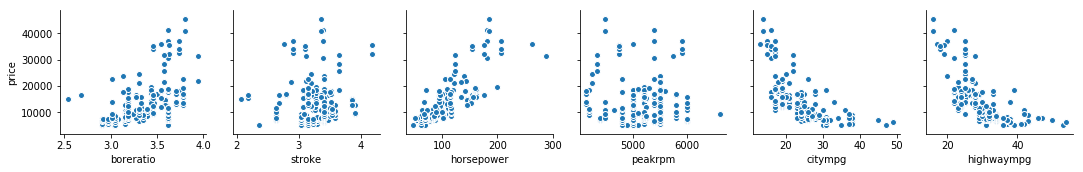

In [33]:
sns.pairplot(cars, x_vars=[
"boreratio",
"stroke",
"horsepower",
"peakrpm",
"citympg",
"highwaympg"], y_vars='price', kind='scatter')
plt.show()

### Preparing data for analysis continued..

In [34]:
# Create a new column for converting categorical variables with 2 values to binary and drop the corresponding 
# categorical column
cars['std_aspiration'] = cars['aspiration'].map({'std': 1, 'turbo': 0})
cars.drop("aspiration", inplace = True, axis=1)

cars['front_enginelocation'] = cars['enginelocation'].map({'front': 1, 'rear': 0})
cars.drop("enginelocation", inplace = True, axis=1)

cars['gas_fueltype'] = cars['fueltype'].map({'gas': 1, 'diesel': 0})
cars.drop("fueltype", inplace = True, axis=1)

cars['two_doornumber'] = cars['doornumber'].map({'two': 1, 'four': 0})
cars.drop("doornumber", inplace = True, axis=1)

# Create a new column to convert cylindercount represented in text to numeric
cars['cylindercount'] = cars['cylindernumber'].map({'four': 4, 'six': 6, 'five': 6, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8})
cars.drop("cylindernumber", inplace = True, axis=1)

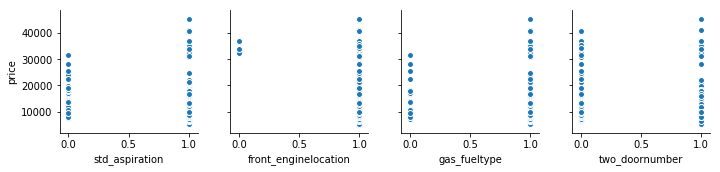

In [35]:
sns.pairplot(cars, x_vars=[
"std_aspiration",
"front_enginelocation",
"gas_fueltype",
"two_doornumber"], y_vars='price', kind='scatter')
plt.show()

In [36]:
# Check the dataframe structure
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling               205 non-null int64
carbody                 205 non-null object
drivewheel              205 non-null object
wheelbase               205 non-null float64
carlength               205 non-null float64
carwidth                205 non-null float64
carheight               205 non-null float64
curbweight              205 non-null int64
enginetype              205 non-null object
enginesize              205 non-null int64
fuelsystem              205 non-null object
boreratio               205 non-null float64
stroke                  205 non-null float64
compressionratio        205 non-null float64
horsepower              205 non-null int64
peakrpm                 205 non-null int64
citympg                 205 non-null int64
highwaympg              205 non-null int64
price                   205 non-null float64
CarMake                 205 non-null object
std_aspiration

In [37]:
cars.head()

,symboling,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,...,peakrpm,citympg,highwaympg,price,CarMake,std_aspiration,front_enginelocation,gas_fueltype,two_doornumber,cylindercount
0,3,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,130,...,5000,21,27,13495.0,alfa-romeo,1,1,1,1,4
1,3,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,130,...,5000,21,27,16500.0,alfa-romeo,1,1,1,1,4
2,1,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,152,...,5000,19,26,16500.0,alfa-romeo,1,1,1,1,6
3,2,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,109,...,5500,24,30,13950.0,audi,1,1,1,0,4
4,2,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,136,...,5500,18,22,17450.0,audi,1,1,1,0,6


Check the remaining categorical variables that are multivalued before creating dummies

In [38]:
cars["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'], dtype=object)

In [39]:
cars["drivewheel"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [40]:
cars["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [41]:
cars["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'], dtype=object)

In [42]:
cars["CarMake"].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

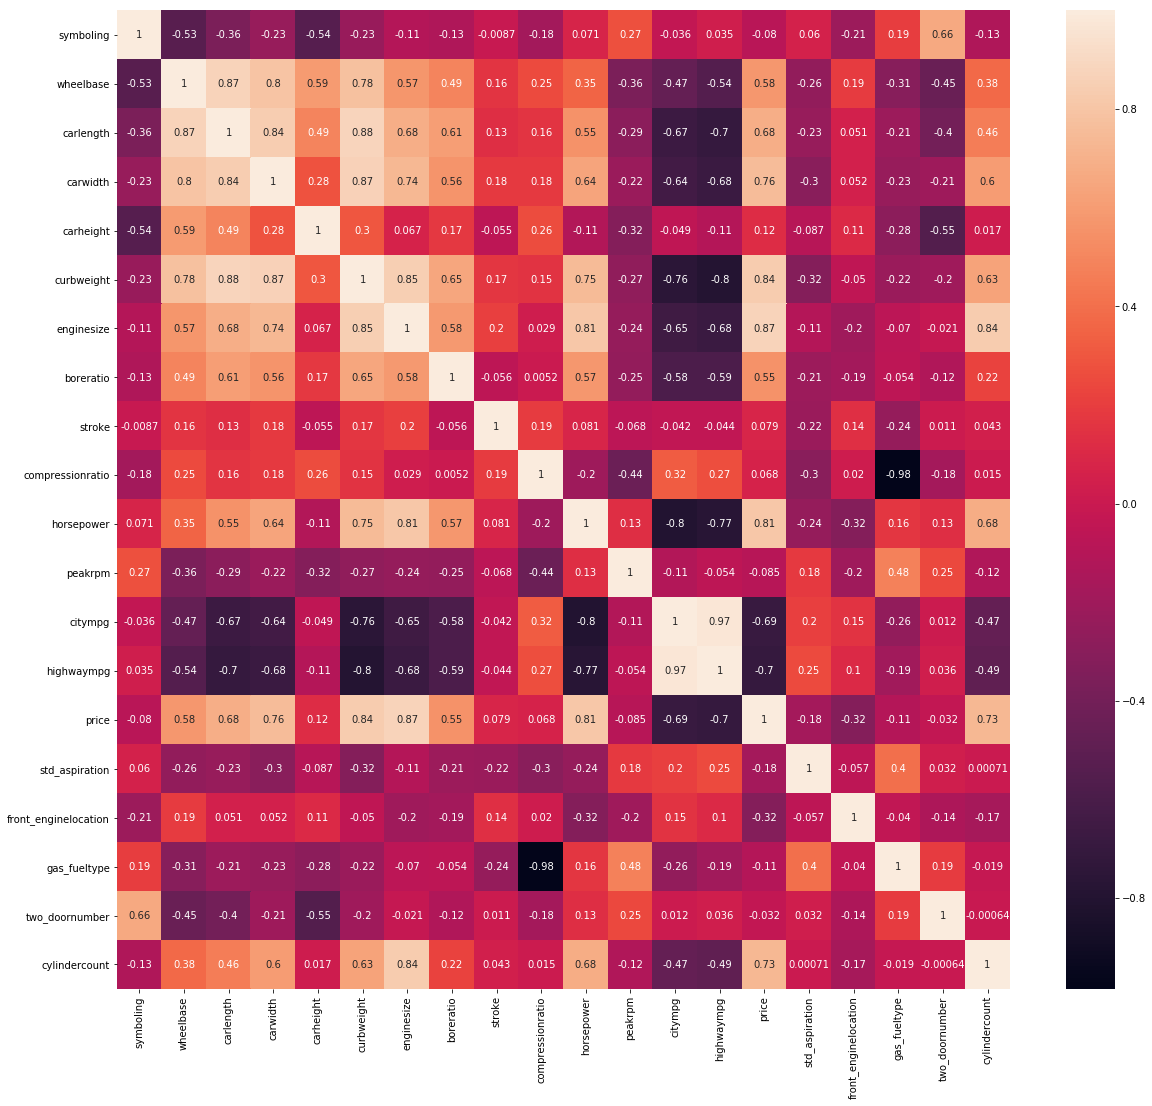

In [43]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,18))     # Size of the figure
sns.heatmap(cars.corr(),annot = True)
plt.show()

Price seems to be influenced by Car Width, Curb Weight, Engine Size, Horsepower, Cylinder count
We can expect to see at least a couple of these attributes in the final data model

# Dummy variable creation

In [44]:
# Lets create dummies for these variables that are categorical: 
# carbody
# drivewheel
# enginetype
# cylindernumber
# fuelsystem
# CarMake

# Create the dummy variables and drop the original categorical variable

In [45]:
cars = pd.concat([cars, pd.get_dummies(cars['carbody'],drop_first=True)], axis=1)
cars.drop("carbody", inplace = True, axis=1)

In [46]:
cars = pd.concat([cars, pd.get_dummies(cars['drivewheel'],drop_first=True)], axis=1)
cars.drop("drivewheel", inplace = True, axis=1)

In [47]:
cars = pd.concat([cars, pd.get_dummies(cars['enginetype'],drop_first=True)], axis=1)
cars.drop("enginetype", inplace = True, axis=1)

In [48]:
cars = pd.concat([cars, pd.get_dummies(cars['fuelsystem'],drop_first=True)], axis=1)
cars.drop("fuelsystem", inplace = True, axis=1)

In [49]:
cars = pd.concat([cars, pd.get_dummies(cars['CarMake'],drop_first=True)], axis=1)
cars.drop("CarMake", inplace = True, axis=1)

In [50]:
# Check the dataframe structure now containing dummy variables
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
symboling               205 non-null int64
wheelbase               205 non-null float64
carlength               205 non-null float64
carwidth                205 non-null float64
carheight               205 non-null float64
curbweight              205 non-null int64
enginesize              205 non-null int64
boreratio               205 non-null float64
stroke                  205 non-null float64
compressionratio        205 non-null float64
horsepower              205 non-null int64
peakrpm                 205 non-null int64
citympg                 205 non-null int64
highwaympg              205 non-null int64
price                   205 non-null float64
std_aspiration          205 non-null int64
front_enginelocation    205 non-null int64
gas_fueltype            205 non-null int64
two_doornumber          205 non-null int64
cylindercount           205 non-null int64
hardtop            

In [51]:
cars.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# These are all the continous variables
cars[["symboling",
"wheelbase",
"carlength",
"carwidth",
"carheight",
"curbweight",
"enginesize",
"boreratio",
"stroke",
"compressionratio",
"horsepower",
"peakrpm",
"citympg",
"highwaympg"]].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


#### Rescaling the features

In [53]:
# defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
cars = cars.apply(normalize) 

### Splitting Data into Training and Testing Sets

In [54]:
cars.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'std_aspiration', 'front_enginelocation', 'gas_fueltype',
       'two_doornumber', 'cylindercount', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

In [55]:
# putting feature variables into X

X = cars[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 
       'std_aspiration', 'front_enginelocation', 'gas_fueltype',
       'two_doornumber', 'cylindercount', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']]

In [56]:
# putting response variable to y

y = cars["price"]

In [57]:
# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [58]:
# Dimension of X_train dataframe

X_train.shape

(143, 59)

In [59]:
# Dimension of y_train dataframe

y_train.shape

(143,)

In [60]:
# Dimension of X_test dataframe

X_test.shape

(62, 59)

In [61]:
# Dimension of y_test dataframe

y_test.shape

(62,)

### Building a linear model

In [62]:
# Importing statsmodel
X_train = sm.add_constant(X_train) 

# Adding constant term to the dataframe
lm_1 = sm.OLS(y_train, X_train).fit() 

In [63]:
# Summary of the first version of the linear model

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     57.91
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           9.63e-51
Time:                        03:51:59   Log-Likelihood:                 289.51
No. Observations:                 143   AIC:                            -469.0
Df Residuals:                      88   BIC:                            -306.1
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
symboling               -0.0169 

#### We have total of 59 variables, So let's start using RFE to get 50 of them

In [64]:
# Linear regression object
lm = LinearRegression()       

# Running RFE with output number of variable equal to 50
rfe = RFE(lm, 50)

# Fitting X_train and y_train
rfe = rfe.fit(X_train, y_train)

# Printing the boolean results
print(rfe.support_)           
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True False
 False  True  True  True  True False  True False  True  True False  True
  True False  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  1  1  1  1  1  2  5
  1  1  1  1  3  1  4  1  1  8  1  1  9  1  1  1  1  1  1  1  1  1 10  1  1
  1  1  1  1  1  1  1  1  7]


In [65]:
X_train.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'std_aspiration',
       'front_enginelocation', 'gas_fueltype', 'two_doornumber',
       'cylindercount', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'],
      dtype='object')

In [66]:
# These are the variables that can be potentially dropped from the model
X_train.columns[~rfe.support_]

Index(['two_doornumber', 'fwd', 'rwd', 'ohcv', '2bbl', 'mfi', 'spfi',
       'mercury', 'volvo'],
      dtype='object')

In [67]:
# Initialize a list to capture all columns that could be dropped
drop_list = ['mercury', 'spfi', 'mfi', 'volvo', 'two_doornumber', 'rwd', '2bbl', 'ohcv', 'fwd']

In [68]:
# Drop those columns from the X dataframe used for training
X_train.drop(drop_list, inplace = True, axis=1)

In [69]:
# Run the linear model after dropping the columns that are not important
X_train = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train).fit() 

In [70]:
# Summary of the linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     68.47
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           7.09e-56
Time:                        03:51:59   Log-Likelihood:                 288.39
No. Observations:                 143   AIC:                            -478.8
Df Residuals:                      94   BIC:                            -333.6
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0013 

In [71]:
# Create linear regression object
lm = LinearRegression()       

# Running RFE with output number of variable equal to 45
rfe = RFE(lm, 45)

rfe = rfe.fit(X_train, y_train)

print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True]
[6 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 3 7 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1]


In [72]:
# Columns that can be potentially dropped
X_train.columns[~rfe.support_]

Index(['const', 'symboling', 'mpfi', 'spdi', 'audi', 'jaguar'], dtype='object')

In [73]:
X_train.columns

Index(['const', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'std_aspiration',
       'front_enginelocation', 'gas_fueltype', 'cylindercount', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf', 'rotor',
       '4bbl', 'idi', 'mpfi', 'spdi', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen'],
      dtype='object')

In [74]:
# Append the columns to be dropped into the list
drop_list.extend(['audi', 'symboling', 'mpfi', 'spdi', 'jaguar'])

In [75]:
# Drop the columns from X_train
X_train.drop(['audi', 'symboling', 'mpfi', 'spdi', 'jaguar'], inplace = True, axis=1)

In [76]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_2 = sm.OLS(y_train, X_train).fit() 

In [77]:
# Print summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     75.20
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           3.50e-59
Time:                        03:51:59   Log-Likelihood:                 283.66
No. Observations:                 143   AIC:                            -479.3
Df Residuals:                      99   BIC:                            -349.0
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0009 

In [78]:
# Create linear regression object
lm = LinearRegression()       

# Run RFE with output variables = 40
rfe = RFE(lm, 40)

rfe = rfe.fit(X_train, y_train)

print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
  True False  True  True  True  True  True  True False  True]
[7 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 6 1
 2 1 1 1 1 1 1 5 1]


In [79]:
# Columns that can be dropped
X_train.columns[~rfe.support_]

Index(['const', 'citympg', 'isuzu', 'mazda', 'nissan', 'toyota'], dtype='object')

In [80]:
X_train.columns

Index(['const', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'std_aspiration',
       'front_enginelocation', 'gas_fueltype', 'cylindercount', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf', 'rotor',
       '4bbl', 'idi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'mazda', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen'],
      dtype='object')

In [81]:
# Add the column to droplist
drop_list.extend(['mazda', 'toyota', 'isuzu', 'citympg', 'nissan'])

In [82]:
# Drop the columns
X_train.drop(['mazda', 'toyota', 'isuzu', 'citympg', 'nissan'], inplace = True, axis=1)

In [83]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_3 = sm.OLS(y_train, X_train).fit() 

In [84]:
# Print summary
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     83.75
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.36e-62
Time:                        03:51:59   Log-Likelihood:                 279.14
No. Observations:                 143   AIC:                            -480.3
Df Residuals:                     104   BIC:                            -364.7
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0008 

In [85]:
# Create linear regression object
lm = LinearRegression()       

# Run RFE with output variables = 30
rfe = RFE(lm, 30)

rfe = rfe.fit(X_train, y_train)

print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True False  True  True
  True  True False  True  True False False False False  True  True False
  True False  True  True False]
[12  1  1  1  1  1  1  1  1  1  1  1  1  6  1  1  1  1  1  1  1  3  1  1  1
  1  9  1  1  2  8  4  7  1  1  5  1 10  1  1 11]


In [86]:
# Columns that can be dropped
X_train.columns[~rfe.support_]

Index(['const', 'std_aspiration', 'dohcv', '4bbl', 'buick', 'chevrolet',
       'dodge', 'honda', 'plymouth', 'renault', 'volkswagen'],
      dtype='object')

In [87]:
X_train.columns

Index(['const', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'highwaympg', 'std_aspiration',
       'front_enginelocation', 'gas_fueltype', 'cylindercount', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf', 'rotor',
       '4bbl', 'idi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'mitsubishi', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'volkswagen'],
      dtype='object')

In [88]:
# Add to drop list
drop_list.extend(['volkswagen', 'renault', '4bbl', 'chevrolet', 'honda', 'std_aspiration', 'plymouth', 'dodge', 'dohcv', 'buick'])

In [89]:
# Drop columns from X_train
X_train.drop(['volkswagen', 'renault', '4bbl', 'chevrolet', 'honda', 'std_aspiration', 'plymouth', 'dodge', 'dohcv', 'buick'], inplace = True, axis=1)

In [90]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_4 = sm.OLS(y_train, X_train).fit() 

In [91]:
# Print summary
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     90.34
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           4.07e-65
Time:                        03:52:00   Log-Likelihood:                 257.01
No. Observations:                 143   AIC:                            -456.0
Df Residuals:                     114   BIC:                            -370.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0034 

In [92]:
# Create linear regression object
lm = LinearRegression()       

# Run RFE with output number of columns = 25
rfe = RFE(lm, 25)

rfe = rfe.fit(X_train, y_train)

print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True  True  True False  True  True  True  True  True False False
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True  True  True]
[7 1 1 1 3 1 1 1 1 1 5 2 1 1 1 1 1 1 1 1 1 6 1 1 1 1 4 1 1 1 1]


In [93]:
# Columns that can be dropped
X_train.columns[~rfe.support_]

Index(['const', 'carheight', 'horsepower', 'peakrpm', 'ohc', 'mitsubishi'], dtype='object')

In [94]:
X_train.columns

Index(['const', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'highwaympg', 'front_enginelocation',
       'gas_fueltype', 'cylindercount', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'l', 'ohc', 'ohcf', 'rotor', 'idi', 'bmw', 'mitsubishi',
       'peugeot', 'porsche', 'saab', 'subaru'],
      dtype='object')

In [95]:
# Add to drop list
drop_list.extend(['ohc', 'horsepower', 'mitsubishi', 'carheight', 'peakrpm'])

In [96]:
# Drop the columns from X_train
X_train.drop(['ohc', 'horsepower', 'mitsubishi', 'carheight', 'peakrpm'], inplace = True, axis=1)

In [97]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_5 = sm.OLS(y_train, X_train).fit() 

In [98]:
# Print summary
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     91.07
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.53e-64
Time:                        03:52:00   Log-Likelihood:                 241.26
No. Observations:                 143   AIC:                            -434.5
Df Residuals:                     119   BIC:                            -363.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0025 

In [99]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [100]:
# Calculate VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

/Users/raagzcd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
24,subaru,inf
19,idi,inf
9,front_enginelocation,inf
10,gas_fueltype,inf
17,ohcf,inf
7,compressionratio,71.790000
3,curbweight,20.150000
4,enginesize,18.500000
1,carlength,13.850000
21,peugeot,13.540000


In [101]:
# Highway mpg has high p-value as well as high VIF, so drop it
drop_list.append('highwaympg')

In [102]:
# Drop the column
X_train.drop('highwaympg', inplace = True, axis=1)

In [103]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_6 = sm.OLS(y_train, X_train).fit() 

In [104]:
# Print results
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     95.84
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.70e-65
Time:                        03:52:00   Log-Likelihood:                 241.13
No. Observations:                 143   AIC:                            -436.3
Df Residuals:                     120   BIC:                            -368.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0027 

In [105]:
# Calculate VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

/Users/raagzcd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
23,subaru,inf
18,idi,inf
16,ohcf,inf
8,front_enginelocation,inf
9,gas_fueltype,inf
7,compressionratio,59.440000
4,enginesize,17.460000
3,curbweight,15.820000
1,carlength,13.360000
13,sedan,13.150000


In [106]:
# Cylindercount has high p-value as well as high VIF, so drop it
drop_list.append('cylindercount')

In [107]:
# Drop cylindercount
X_train.drop('cylindercount', inplace = True, axis=1)

In [108]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_7 = sm.OLS(y_train, X_train).fit() 

In [109]:
# Print summary
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     98.41
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           8.36e-66
Time:                        03:52:00   Log-Likelihood:                 239.21
No. Observations:                 143   AIC:                            -434.4
Df Residuals:                     121   BIC:                            -369.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0017 

In [110]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

/Users/raagzcd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
22,subaru,inf
17,idi,inf
15,ohcf,inf
8,front_enginelocation,inf
9,gas_fueltype,inf
7,compressionratio,57.500000
3,curbweight,15.640000
1,carlength,13.150000
19,peugeot,13.040000
12,sedan,12.750000


In [111]:
# Boreration has a high p-value as well as VIF
drop_list.append('boreratio')

In [112]:
# Drop bore ratio
X_train.drop('boreratio', inplace = True, axis=1)

In [113]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_8 = sm.OLS(y_train, X_train).fit() 

In [114]:
# Print summary
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     100.2
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           7.57e-66
Time:                        03:52:01   Log-Likelihood:                 236.57
No. Observations:                 143   AIC:                            -431.1
Df Residuals:                     122   BIC:                            -368.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0030 

In [115]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

/Users/raagzcd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
21,subaru,inf
8,gas_fueltype,inf
16,idi,inf
14,ohcf,inf
7,front_enginelocation,inf
6,compressionratio,56.690000
3,curbweight,15.580000
18,peugeot,13.040000
11,sedan,12.260000
13,l,12.130000


In [116]:
# Compression Ratio has a high p-value as well as VIF
drop_list.append('compressionratio')

In [117]:
# Drop compression ratio
X_train.drop('compressionratio', inplace = True, axis=1)

In [118]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_9 = sm.OLS(y_train, X_train).fit() 

In [119]:
# Print summary
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     103.3
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           3.74e-66
Time:                        03:52:01   Log-Likelihood:                 234.64
No. Observations:                 143   AIC:                            -429.3
Df Residuals:                     123   BIC:                            -370.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0027 

In [120]:
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

/Users/raagzcd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
20,subaru,inf
7,gas_fueltype,inf
15,idi,inf
13,ohcf,inf
6,front_enginelocation,inf
3,curbweight,14.070000
17,peugeot,12.900000
10,sedan,12.240000
12,l,12.130000
1,carlength,11.910000


In [121]:
# IDI has a high p-value as well as VIF
drop_list.append('idi')

In [122]:
# Drop IDI
X_train.drop('idi', inplace = True, axis=1)

In [123]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_10 = sm.OLS(y_train, X_train).fit() 

In [124]:
# Print summary
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     103.3
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           3.74e-66
Time:                        03:52:01   Log-Likelihood:                 234.64
No. Observations:                 143   AIC:                            -429.3
Df Residuals:                     123   BIC:                            -370.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0027 

In [125]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

/Users/raagzcd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
19,subaru,inf
6,front_enginelocation,inf
13,ohcf,inf
3,curbweight,14.070000
16,peugeot,12.900000
10,sedan,12.240000
12,l,12.130000
1,carlength,11.910000
9,hatchback,10.570000
4,enginesize,7.370000


In [126]:
# Gas fueltype has a high p-value but an acceptable VIF
drop_list.append('gas_fueltype')

In [127]:
# Drop gas fueltype
X_train.drop('gas_fueltype', inplace = True, axis=1)

In [128]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_11 = sm.OLS(y_train, X_train).fit() 

In [129]:
# Print summary
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     109.2
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           5.06e-67
Time:                        03:52:01   Log-Likelihood:                 234.21
No. Observations:                 143   AIC:                            -430.4
Df Residuals:                     124   BIC:                            -374.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0026 

In [130]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

/Users/raagzcd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
18,subaru,inf
6,front_enginelocation,inf
12,ohcf,inf
3,curbweight,13.610000
15,peugeot,12.890000
9,sedan,12.240000
11,l,12.130000
1,carlength,11.560000
8,hatchback,10.530000
0,wheelbase,7.230000


In [131]:
# Porsche has a high p-value as well as high VIF
drop_list.append('porsche')

In [132]:
# Drop porsche
X_train.drop('porsche', inplace = True, axis=1)

In [133]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_12 = sm.OLS(y_train, X_train).fit() 

In [134]:
# Print summary
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     113.3
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           2.52e-67
Time:                        03:52:01   Log-Likelihood:                 232.26
No. Observations:                 143   AIC:                            -428.5
Df Residuals:                     125   BIC:                            -375.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0028 

In [135]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

/Users/raagzcd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
17,subaru,inf
6,front_enginelocation,inf
12,ohcf,inf
3,curbweight,13.570000
15,peugeot,12.890000
11,l,12.130000
9,sedan,12.070000
1,carlength,11.230000
8,hatchback,10.390000
4,enginesize,7.000000


In [136]:
# Subaru has a high VIF
drop_list.append('subaru')

In [137]:
# Drop subaru
X_train.drop('subaru', inplace = True, axis=1)

In [138]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_14 = sm.OLS(y_train, X_train).fit() 

In [139]:
# Print summary
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     113.3
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           2.52e-67
Time:                        03:52:02   Log-Likelihood:                 232.26
No. Observations:                 143   AIC:                            -428.5
Df Residuals:                     125   BIC:                            -375.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0028 

In [140]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
3,curbweight,13.57
15,peugeot,12.89
11,l,12.13
9,sedan,12.07
1,carlength,11.23
8,hatchback,10.39
4,enginesize,7.00
0,wheelbase,6.94
10,wagon,6.02
2,carwidth,5.95


In [141]:
# Peugeot has a high VIF
drop_list.append('peugeot')

In [142]:
# Drop peugeot
X_train.drop('peugeot', inplace = True, axis=1)

In [143]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_15 = sm.OLS(y_train, X_train).fit() 

In [144]:
# Print summary
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     103.1
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           2.90e-64
Time:                        03:52:02   Log-Likelihood:                 221.43
No. Observations:                 143   AIC:                            -408.9
Df Residuals:                     126   BIC:                            -358.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0028 

In [145]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
3,curbweight,13.51
9,sedan,12.07
1,carlength,11.17
8,hatchback,10.38
0,wheelbase,6.94
4,enginesize,6.81
10,wagon,6.01
2,carwidth,5.92
7,hardtop,2.57
12,ohcf,1.88


In [146]:
# Sedan has a high P-value and high VIF
drop_list.append('sedan')

In [147]:
# Drop Sedan
X_train.drop('sedan', inplace = True, axis=1)

In [148]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_16 = sm.OLS(y_train, X_train).fit() 

In [149]:
# Print summary
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     106.4
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           3.11e-64
Time:                        03:52:02   Log-Likelihood:                 218.65
No. Observations:                 143   AIC:                            -405.3
Df Residuals:                     127   BIC:                            -357.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0024 

In [150]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
3,curbweight,12.85
1,carlength,11.12
4,enginesize,6.81
0,wheelbase,6.46
2,carwidth,5.92
11,ohcf,1.84
6,front_enginelocation,1.70
5,stroke,1.69
8,hatchback,1.61
10,l,1.57


In [151]:
# Wheelbase has a high P-value as well as high VIF
drop_list.append('wheelbase')

In [152]:
# Drop wheelbase
X_train.drop('wheelbase', inplace = True, axis=1)

In [153]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_17 = sm.OLS(y_train, X_train).fit() 

In [154]:
# Print summary
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     112.4
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           9.94e-65
Time:                        03:52:02   Log-Likelihood:                 217.25
No. Observations:                 143   AIC:                            -404.5
Df Residuals:                     128   BIC:                            -360.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0021 

In [155]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
2,curbweight,12.84
0,carlength,7.97
3,enginesize,6.80
1,carwidth,5.57
10,ohcf,1.84
4,stroke,1.69
7,hatchback,1.61
5,front_enginelocation,1.60
9,l,1.38
8,wagon,1.37


In [156]:
# Car length has a high VIF
drop_list.append('carlength')

In [157]:
# Drop car length
X_train.drop('carlength', inplace = True, axis=1)

In [158]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_18 = sm.OLS(y_train, X_train).fit() 

In [159]:
# Print summary
print(lm_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     99.95
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.08e-60
Time:                        03:52:03   Log-Likelihood:                 204.16
No. Observations:                 143   AIC:                            -380.3
Df Residuals:                     129   BIC:                            -338.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0039 

In [160]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
1,curbweight,10.34
2,enginesize,6.69
0,carwidth,4.48
9,ohcf,1.84
3,stroke,1.68
4,front_enginelocation,1.59
8,l,1.38
7,wagon,1.34
5,hardtop,1.29
6,hatchback,1.28


In [161]:
# Curbweight has a high VIF
drop_list.append('curbweight')

In [162]:
# Drop curbweight
X_train.drop('curbweight', inplace = True, axis=1)

In [163]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_19 = sm.OLS(y_train, X_train).fit() 

In [164]:
# Print summary
print(lm_19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     98.30
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           4.48e-59
Time:                        03:52:03   Log-Likelihood:                 197.40
No. Observations:                 143   AIC:                            -368.8
Df Residuals:                     130   BIC:                            -330.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0038 

In [165]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
1,enginesize,3.20
0,carwidth,2.95
8,ohcf,1.84
2,stroke,1.67
3,front_enginelocation,1.58
4,hardtop,1.27
5,hatchback,1.26
7,l,1.18
6,wagon,1.16
10,bmw,1.15


In [166]:
# Wagon has a high p-value and negative co-efficient
drop_list.append('wagon')

In [167]:
# Drop wagon
X_train.drop('wagon', inplace = True, axis=1)

In [168]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_20 = sm.OLS(y_train, X_train).fit() 

In [169]:
# Print summary
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     108.0
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           4.23e-60
Time:                        03:52:03   Log-Likelihood:                 197.39
No. Observations:                 143   AIC:                            -370.8
Df Residuals:                     131   BIC:                            -335.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0038 

In [170]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
1,enginesize,3.19
0,carwidth,2.95
7,ohcf,1.81
2,stroke,1.67
3,front_enginelocation,1.58
4,hardtop,1.26
5,hatchback,1.17
6,l,1.17
8,rotor,1.14
9,bmw,1.14


In [171]:
# Hardtop has a high p-value
drop_list.append('hardtop')

In [172]:
# Drop hardtop
X_train.drop('hardtop', inplace = True, axis=1)

In [173]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_21 = sm.OLS(y_train, X_train).fit() 

In [174]:
# Print summary
print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     119.5
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           4.25e-61
Time:                        03:52:03   Log-Likelihood:                 197.26
No. Observations:                 143   AIC:                            -372.5
Df Residuals:                     132   BIC:                            -339.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0041 

In [175]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
1,enginesize,3.11
0,carwidth,2.93
6,ohcf,1.81
2,stroke,1.67
3,front_enginelocation,1.43
5,l,1.17
4,hatchback,1.15
7,rotor,1.14
8,bmw,1.13
9,saab,1.12


In [176]:
# Hatchback has a high p-value
drop_list.append('hatchback')

In [177]:
# Drop hatchback
X_train.drop('hatchback', inplace = True, axis=1)

In [178]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_22 = sm.OLS(y_train, X_train).fit() 

In [179]:
# Print summary
print(lm_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     132.2
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           7.31e-62
Time:                        03:52:04   Log-Likelihood:                 196.48
No. Observations:                 143   AIC:                            -373.0
Df Residuals:                     133   BIC:                            -343.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0041 

In [180]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
1,enginesize,3.11
0,carwidth,2.86
5,ohcf,1.81
2,stroke,1.66
3,front_enginelocation,1.43
4,l,1.16
7,bmw,1.11
8,saab,1.11
6,rotor,1.10


In [181]:
# "l" has a high p-value
drop_list.append('l')

In [182]:
# Drop l
X_train.drop('l', inplace = True, axis=1)

In [183]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_23 = sm.OLS(y_train, X_train).fit() 

In [184]:
# Print summary
print(lm_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     147.8
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.31e-62
Time:                        03:52:04   Log-Likelihood:                 195.61
No. Observations:                 143   AIC:                            -373.2
Df Residuals:                     134   BIC:                            -346.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0039 

In [185]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
1,enginesize,2.98
0,carwidth,2.59
4,ohcf,1.77
2,stroke,1.61
3,front_enginelocation,1.41
6,bmw,1.11
5,rotor,1.09
7,saab,1.09


In [186]:
# Stroke has a high p-value
drop_list.append('stroke')

In [187]:
# Drop stroke
X_train.drop('stroke', inplace = True, axis=1)

In [188]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_24 = sm.OLS(y_train, X_train).fit() 

In [189]:
# Print summary
print(lm_24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     163.1
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.26e-62
Time:                        03:52:04   Log-Likelihood:                 192.87
No. Observations:                 143   AIC:                            -369.7
Df Residuals:                     135   BIC:                            -346.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0037 

In [190]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
1,enginesize,2.88
0,carwidth,2.58
2,front_enginelocation,1.41
3,ohcf,1.26
4,rotor,1.09
5,bmw,1.07
6,saab,1.02


In [191]:
# OHCF has a high p-value
drop_list.append('ohcf')

In [192]:
# Drop OHCF
X_train.drop('ohcf', inplace = True, axis=1)

In [193]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_25 = sm.OLS(y_train, X_train).fit() 

In [194]:
# Print summary
print(lm_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     189.6
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.65e-63
Time:                        03:52:04   Log-Likelihood:                 192.20
No. Observations:                 143   AIC:                            -370.4
Df Residuals:                     136   BIC:                            -349.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0033 

In [195]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
1,enginesize,2.88
0,carwidth,2.58
2,front_enginelocation,1.16
3,rotor,1.08
4,bmw,1.07
5,saab,1.01


In [196]:
# Saab has a high p-value
drop_list.append('saab')

In [197]:
# Drop saab
X_train.drop('saab', inplace = True, axis=1)

In [198]:
# Run linear regression
X_train = sm.add_constant(X_train)
lm_26 = sm.OLS(y_train, X_train).fit() 

In [199]:
# Print summary
print(lm_26.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           3.81e-64
Time:                        03:52:04   Log-Likelihood:                 190.83
No. Observations:                 143   AIC:                            -369.7
Df Residuals:                     137   BIC:                            -351.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0028 

In [200]:
# Print VIF
vif_cal(input_data=cars.drop(drop_list, axis=1), dependent_col="price")

,Var,Vif
1,enginesize,2.85
0,carwidth,2.55
2,front_enginelocation,1.16
3,rotor,1.08
4,bmw,1.07


### Making Predictions Using the Final Model

In [201]:
# Using LM 26 for the prediction

In [202]:
# Adding  constant variable to test dataframe
X_test_new = sm.add_constant(X_test, has_constant='add')


In [203]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 60 columns):
const                   62 non-null float64
symboling               62 non-null float64
wheelbase               62 non-null float64
carlength               62 non-null float64
carwidth                62 non-null float64
carheight               62 non-null float64
curbweight              62 non-null float64
enginesize              62 non-null float64
boreratio               62 non-null float64
stroke                  62 non-null float64
compressionratio        62 non-null float64
horsepower              62 non-null float64
peakrpm                 62 non-null float64
citympg                 62 non-null float64
highwaympg              62 non-null float64
std_aspiration          62 non-null float64
front_enginelocation    62 non-null float64
gas_fueltype            62 non-null float64
two_doornumber          62 non-null float64
cylindercount           62 non-null float64
hardtop       

In [204]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new.drop(['mercury',
 'spfi',
 'mfi',
 'volvo',
 'two_doornumber',
 'rwd',
 '2bbl',
 'ohcv',
 'fwd',
 'audi',
 'symboling',
 'mpfi',
 'spdi',
 'jaguar',
 'mazda',
 'toyota',
 'isuzu',
 'citympg',
 'nissan',
 'volkswagen',
 'renault',
 '4bbl',
 'chevrolet',
 'honda',
 'std_aspiration',
 'plymouth',
 'dodge',
 'dohcv',
 'buick',
 'ohc',
 'horsepower',
 'mitsubishi',
 'carheight',
 'peakrpm',
 'highwaympg',
 'cylindercount',
 'boreratio',
 'compressionratio',
 'idi',
 'gas_fueltype',
 'porsche',
 'subaru',
 'peugeot',
 'sedan',
 'wheelbase',
 'carlength',
 'curbweight',
 'wagon',
 'hardtop',
 'hatchback',
 'l',
 'stroke',
 'ohcf',
 'saab'], inplace = True, axis=1)

In [205]:
# Making predictions
y_pred = lm_26.predict(X_test_new)

In [206]:
# Dimensions of X_test
X_test_new.shape

(62, 6)

In [207]:
# Dimensions of X_train
X_train.shape

(143, 6)

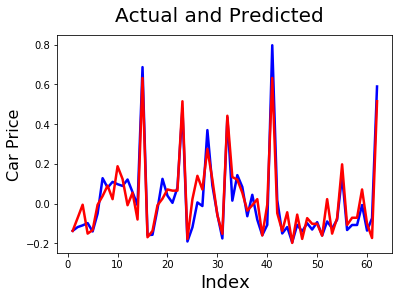

In [208]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)   
plt.show()

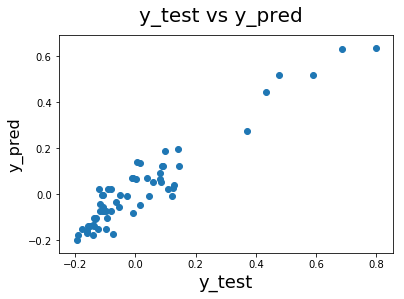

In [209]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   
plt.show()

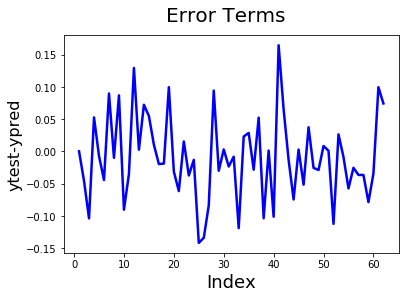

In [210]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

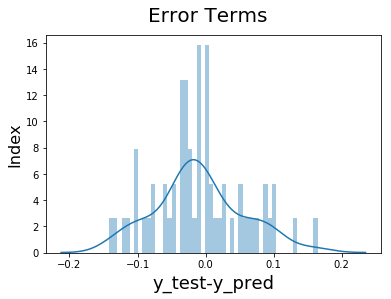

In [211]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)         
plt.show()

In [212]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.06554584055


In [213]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

In [214]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [215]:
# print the intercept
print(lm.intercept_)

0.00279459632203


In [216]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
const,0.000000
carwidth,0.413907
enginesize,0.653995
front_enginelocation,-0.395373
rotor,0.149556
bmw,0.219853


In [217]:
# Determine MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing mean square error and R square value
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0042962572134
r_square_value : 0.900451710602


### Final Summary

### Representation in terms of a linear equation

These are the values obtained for the final model
1. beta0(intercept) : 0.00279459632203
2. beta1(coefficient of carwidth) : 0.413907
3. beta2(coefficient of enginesize) : 0.653995
4. beta3(coefficient of front_enginelocation) : -0.395373
5. beta4(coefficient of rotor) : 0.149556
6. beta5(coefficient of bmw) : 0.219853

###### Following steps show how the unnormalized values can be obtained

In [218]:
# Calculation of intercept using the formula provided in 
# https://stats.stackexchange.com/questions/74622/converting-standardized-betas-back-to-original-variables 

((0.00279459632203) * (45400 - 5118.0) + (13276.710570731706)) - ((0.413907 * ((45400 - 5118.0)/ (72.297 - 60.297)) * 65.907 ) + (0.653995* ((45400 - 5118.0)/ (326 - 61)) * 126.91) + (-0.395373 *((45400 - 5118.0)/ (1-0)) * 0.985) + (0.149556 * ((45400 - 5118.0)/ (1-0)) * 0.0195) + (0.219853 * ((45400 - 5118.0)/ (1-0)) * 0.038))

-75565.9003606725

In [219]:
# Calculation of coefficient beta1

0.413907 * (45400 - 5118)/(72.297 - 60.297)

1389.4168145

In [220]:
# Calculation of coefficient beta2

0.653995 * (45400 - 5118)/(326 - 61)

99.41217581132075

In [221]:
# Calculation of coefficient beta3

-0.395373 * (45400 - 5118)/(1 - 0)

-15926.415185999998

In [222]:
# Calculation of coefficient beta4

0.149556 * (45400 - 5118)/(1 - 0)

6024.414792

In [223]:
# Calculation of coefficient beta5

0.219853 * (45400 - 5118)/(1 - 0)

8856.118546

##### Final linear equation is as follows

#### y = 1389.4168145(x1) + 99.41217581132075(x2) - 15926.415185999998(x3) + 6024.414792(x4) + 8856.118546(x5) - 75565.9003606725